In [194]:
import math
import scipy.ndimage as ndi
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [195]:
sigma=1.4
img = Image.open("./data/dogs-vs-cats/train/cat.10179.jpg").convert('L')

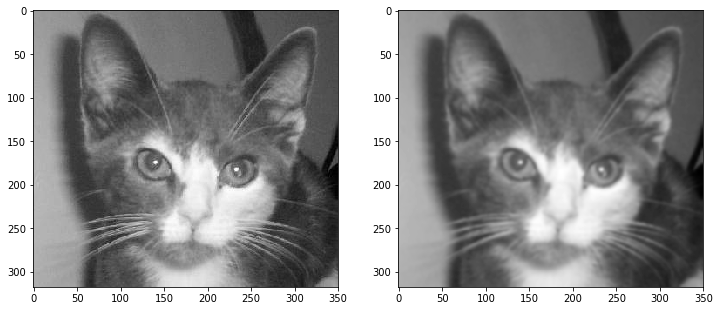

In [196]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap=plt.cm.gray)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(G, cmap=plt.cm.gray)
plt.show()

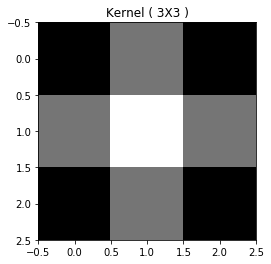

array([[0.71653131, 0.84648172, 0.71653131],
       [0.84648172, 1.        , 0.84648172],
       [0.71653131, 0.84648172, 0.71653131]])

In [199]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), (size // 2), size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    kernel_2D *= 1.0 / kernel_2D.max()
    
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()

    return kernel_2D

    
def gaussian_blur(img, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return kernel

gaussian_blur(img, 3, verbose=True)